# (연습) 2차원 데이터 시각화

**기본 설정**

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(8, 6))

## 붓꽃 데이터셋 분류 그래프

붓꽃 데이터셋을 아래 방식으로 불러온다. 

In [37]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

**참고**

`sklearn`은 사이킷런 라이브러리이며 머신러닝에 가장 중요한 라이브러리 중 하나다.

`load_iris()` 함수의 반환값은 사이킷런 라이브리가 제공하는 `Bunch` 자료형이다. 

In [40]:
type(iris)

sklearn.utils._bunch.Bunch

`Bunch` 객체는 데이터셋을 사전 형식으로 담으며, 키를 객체의 속성처럼 다룰 수 있다.
사용된 키를 확인해보자.

In [41]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

이중에 붓꽃 데이터는 `'data'` 키가 가리키는 데이터프레임 객체며,
총 150개의 샘플이 각각 네 개의 특성을 갖는다.

| 특성 | 의미 |
| :--- | :--- |
| sepal length | 꽃받침 길이 |
| sepal width | 꽃받침 너비 |
| petal length | 꽃잎 길이 |
| petal width | 꽃잎 길이 |

In [44]:
iris_data = iris['data']
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


품종 데이터는 `'target'` 키가 가리키는 시리즈 객체다.
항목은 0, 1, 2 정수이지만, 실제로는 구분을 위한 범주형으로 특성이다.
각 숫자는 붓꽃의 품종을 가리킨다.

| 번호 | 품종 |
| :--- | :--- |
| 0 | 세토사(Iris setosa) |
| 1 | 버시컬러(Iris versicolor) |
| 2 | 버지니카(Iris verginica) |

In [45]:
iris_varieties = iris['target']
iris_varieties

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

시각화를 위해 꽃잎<font size='2'>petal</font>의 길이와 너비 두 개의 특성만 선택한다.

* `values` 속성: 데이터프레임 또는 시리즈의 항목으로 구성된 넘파이 어레이

In [8]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target.values

꽃잎의 길이와 너비를 이용하여 품종별로 산점도를 그려보자. 
먼저 세토사 품종의 데이터는 다음과 같다. 

In [9]:
mask_setosa = (y == 0)
X_setosa = X[mask_setosa]

50개의 샘플로 구성된다.

In [10]:
X_setosa.shape

(50, 2)

버시컬러 데이터셋과 버지니카 데이터셋도 동일한 방식으로 구해진다.

In [11]:
mask_versicolor = (y == 1)
X_versicolor = X[mask_versicolor]

In [12]:
mask_verginica = (y == 2)
X_verginica = X[mask_verginica]

각 데이터셋의 산점도를 다른 색을 이용하여 그리면 다음과 같다.

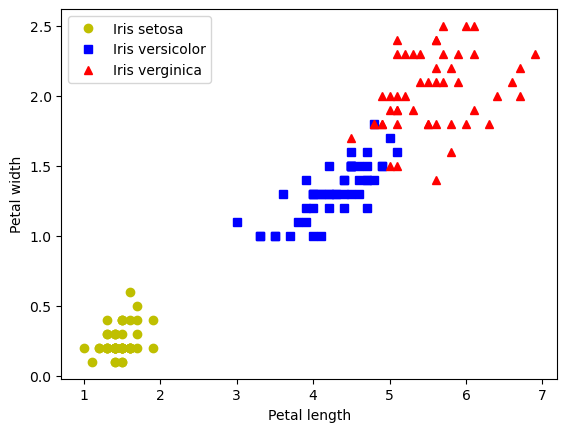

In [13]:
plt.plot(X_setosa[:, 0], X_setosa[:, 1], "yo", label="Iris setosa")             # 노랑 원
plt.plot(X_versicolor[:, 0], X_versicolor[:, 1], "bs", label="Iris versicolor") # 파랑 네모
plt.plot(X_verginica[:, 0], X_verginica[:, 1], "r^", label="Iris verginica")    # 빨강 세모

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")

plt.show()

범위를 x 축은 0에서 7.5 사이로, 
y 축은 0에서 3 사이로 지정한 다음에
축의 척도를 일치 시키면 그림이 사뭇 다르게 보인다.

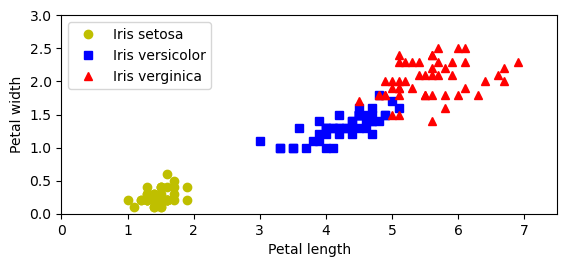

In [14]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")     # 노랑 원
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor") # 파랑 네모
plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "r^", label="Iris verginica")  # 빨강 세모

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")

plt.axis([0, 7.5, 0, 3])
plt.gca().set_aspect("equal")

plt.show()

격자 무늬 배경도 추가하자.

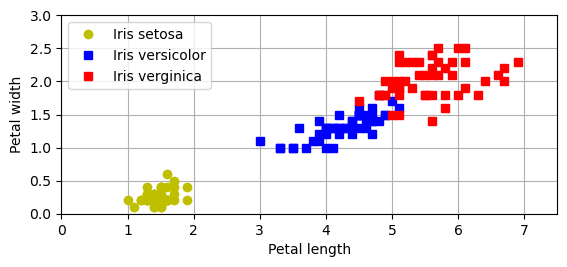

In [15]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")     # 노랑 원
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor") # 파랑 네모
plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "rs", label="Iris verginica")  # 빨강 세모

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")

plt.axis([0, 7.5, 0, 3])
plt.gca().set_aspect("equal")
plt.grid()

plt.show()

아래 코드는 두 개의 직선을 그린다.

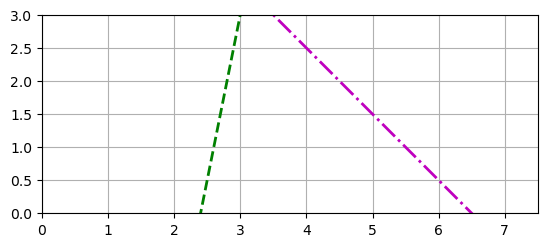

In [16]:
# x 좌표
x0 = np.linspace(0, 7.5, 200) # 0부터 7.5 사이를 200개의 작은 구간으로 균등하게 쪼갠 x 좌표값

# 두 개의 직선에 대한 y 좌표값
pred_1 = 5 * x0 - 12  # 직선 1의 y 좌표
pred_2 = -x0 + 6.5    # 직선 2의 y 좌표

plt.plot(x0, pred_1, "g--", linewidth=2) # 직선 1
plt.plot(x0, pred_2, "m-.", linewidth=2) # 직선 2

plt.axis([0, 7.5, 0, 3])
plt.gca().set_aspect("equal")
plt.grid()

plt.show()

위 두 직선과 붓꽃 데이터셋의 산포도를 합치면
품종을 구별하는 경계선을 얻는다.

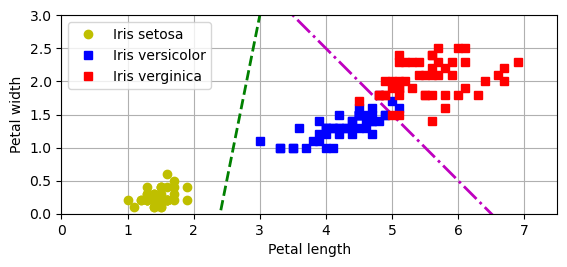

In [17]:
x0 = np.linspace(0, 7.5, 200)
pred_1 = 5 * x0 - 12
pred_2 = -x0 + 6.5
pred_3 = 0.05 * x0 + 0.6

plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-.", linewidth=2)
# plt.plot(x0, pred_3, "y-", linewidth=2)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")     # 노랑 원
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor") # 파랑 네모
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rs", label="Iris verginica")  # 빨강 세모
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7.5, 0, 3])
plt.gca().set_aspect("equal")
plt.grid()

plt.show()

## 분류 대 군집화

**분류**

각 데이터에 대해 하나의 레이블을 할당한다.
붓꽃의 꽃잎 길이와 너비를 특성으로 사용해서 
품종을 레이블로 사용한 결과를 그래프로 그려보자.

먼저 붓꽃 데이터 불러온다.

In [18]:
from sklearn.datasets import load_iris

iris = load_iris() # load_iris(as_frane=False)
X = iris.data
y = iris.target

In [19]:
type(iris)

sklearn.utils._bunch.Bunch

`X`, `y` 의 자료형은 넘파이 어레이다.

In [20]:
type(X)

numpy.ndarray

In [21]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [22]:
type(y)

numpy.ndarray

In [23]:
y[:5]

array([0, 0, 0, 0, 0])

품종 종류는 다음과 같다.

In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

품종별 다른 색상으로 산점도를 그리기 위해
부울 인덱싱과 인덱싱을 함께 사용한다. 

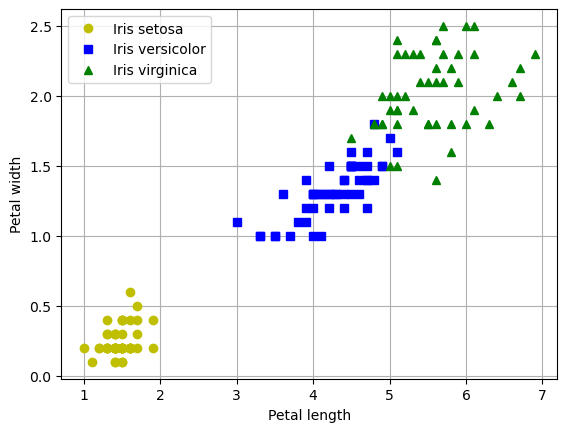

In [25]:
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.grid()

plt.show()

**군집화**

**군집**<font size='2'>cluster</font>은 유사한 대상들의 모음을 가리킨다.
예를 들어, 산이나 공원에서 볼 수 있는 이름은 모르지만 동일 품종의 꽃으로 이루어진 군집 등을
생각하면 된다.
**군집화**<font size='2'>clustering</font>는 대상들을 나누어 군집을 
형성하는 것을 말한다. 

각 샘플에 하나의 그룹을 할당한다는 점에서 분류와 유사하다.
하지만 각 샘플에 대해 레이블을 할당하는 게 아니라
유사한 샘플들의 군집으로 구분한다는 점에서 다르다.

아래 그림은 아이리스 붓꽃 데이터에 대한 군집화의 결과를 보여준다. 
분류는 세 개의 품종을 매우 잘 분류하지만 군집은 세토사 군집과 나머지 군집으로 구분할 뿐이다.

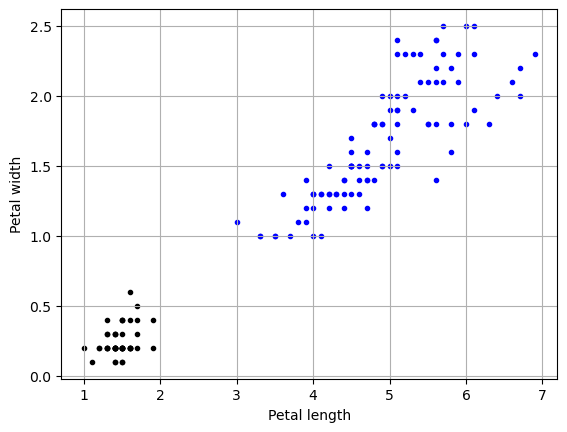

In [26]:
plt.scatter(X[y==0, 2], X[y==0, 3], c="k", marker=".")
plt.scatter(X[(y==1) | (y==2), 2], X[(y==1) | (y==2), 3], c="b", marker=".")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.grid()

plt.show()

## 서브플롯 활용

분류와 군집 그래프 여러 개를 동시에 그리기 위해 서브플롯을 활용하는
세 가지 방식을 소개한다.

**방식 1: `Figure` 객체의 `add_subplot()` 메서드 활용**

`add_subplot()` 함수의 반환값은 `Axes` 객체다.
`Axes` 객체는 그래프와 관련된 많은 기능을 지원한다.

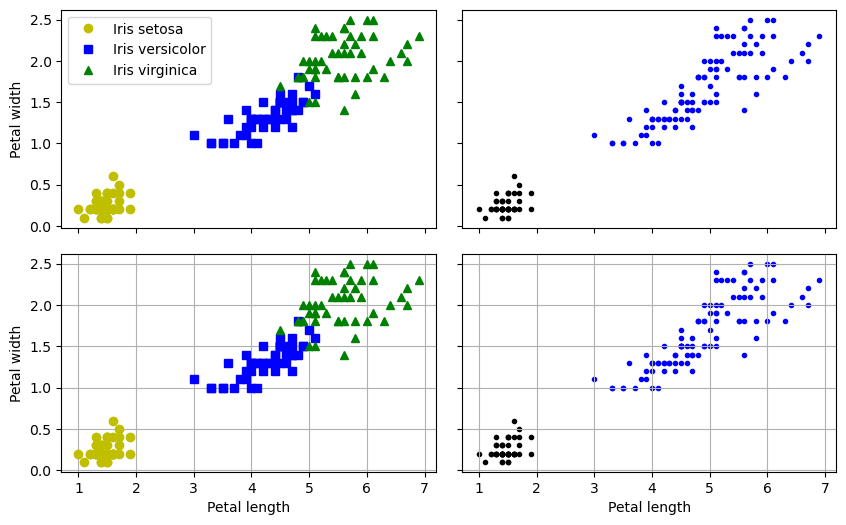

In [27]:
plt.rc('figure', figsize=(10, 6))

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
ax1.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
ax1.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
ax1.set_ylabel("Petal width")
ax1.tick_params(labelbottom=False)
ax1.legend()

ax2.scatter(X[y==0, 2], X[y==0, 3], c="k", marker=".")
ax2.scatter(X[(y==1) | (y==2), 2], X[(y==1) | (y==2), 3], c="b", marker=".")
ax2.tick_params(labelleft=False, labelbottom=False)

ax3.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
ax3.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
ax3.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
ax3.set_xlabel("Petal length")
ax3.set_ylabel("Petal width")
ax3.grid()

ax4.scatter(X[y==0, 2], X[y==0, 3], c="k", marker=".")
ax4.scatter(X[(y==1) | (y==2), 2], X[(y==1) | (y==2), 3], c="b", marker=".")
ax4.set_xlabel("Petal length")
ax4.tick_params(labelleft=False)
ax4.grid()

fig.subplots_adjust(wspace=0.07, hspace=0.12) # 상하좌우 여백
# plt.subplots_adjust(wspace=0.07, hspace=0.12) # 상하좌우 여백

plt.show()

**방식 2: `plt.subplots()` 함수와 `Axes` 객체 활용**

`plt.subplots()` 함수의 반환값은 `Figure` 객체와 `Axes` 객체의 어레이로 구성된 튜플이다.

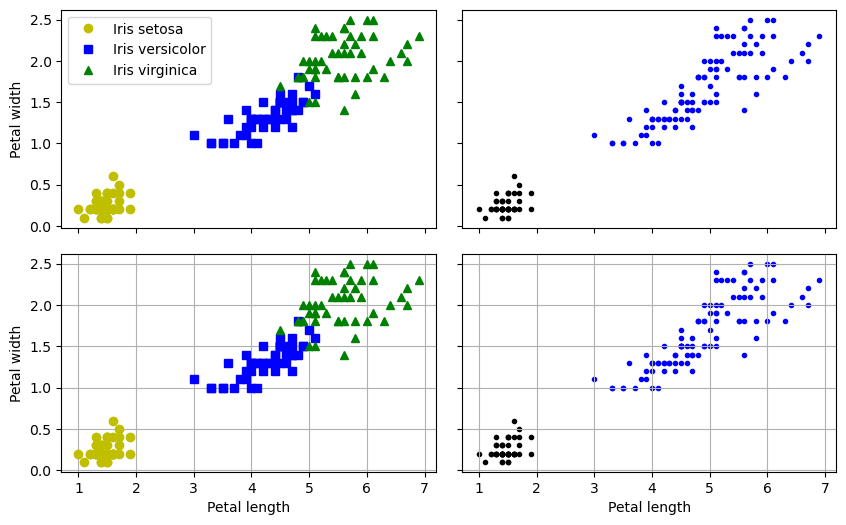

In [28]:
plt.rc('figure', figsize=(10, 6))

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

axes[0, 0].plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
axes[0, 0].plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
axes[0, 0].plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
axes[0, 0].set_ylabel("Petal width")
axes[0, 0].legend()

axes[0, 1].scatter(X[y==0, 2], X[y==0, 3], c="k", marker=".")
axes[0, 1].scatter(X[(y==1) | (y==2), 2], X[(y==1) | (y==2), 3], c="b", marker=".")

axes[1, 0].plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
axes[1, 0].plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
axes[1, 0].plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
axes[1, 0].set_xlabel("Petal length")
axes[1, 0].set_ylabel("Petal width")
axes[1, 0].grid()

axes[1, 1].scatter(X[y==0, 2], X[y==0, 3], c="k", marker=".")
axes[1, 1].scatter(X[(y==1) | (y==2), 2], X[(y==1) | (y==2), 3], c="b", marker=".")
axes[1, 1].set_xlabel("Petal length")
axes[1, 1].grid()

fig.subplots_adjust(wspace=0.07, hspace=0.12) # 상하좌우 여백
# plt.subplots_adjust(wspace=0.07, hspace=0.12) # 상하좌우 여백

plt.show()